In [1]:
# basic dependencies
import pandas as pd
import numpy as np

In [2]:
# load our data
id_train_df = pd.read_csv("train_identity.csv")
tx_train_df = pd.read_csv("train_transaction.csv")

In [3]:
# visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# take a look at some data
print("identity data: ", id_train_df.shape)
print("transaction data: ",tx_train_df.shape)

identity data:  (144233, 41)
transaction data:  (590540, 394)


In [42]:
# pull together both datasets
train_full_df = pd.merge(tx_train_df, id_train_df, on="TransactionID", how="left")

In [43]:
# let's take a look at the shape of that, want to make sure I get 434 cols (sum of the cols of the two)
train_full_df.shape

(590540, 434)

In [44]:
# lets see the percentage of fraud transactions. probably going to be low
len(train_full_df[train_full_df["isFraud"]==1])/len(train_full_df)

0.03499000914417313

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

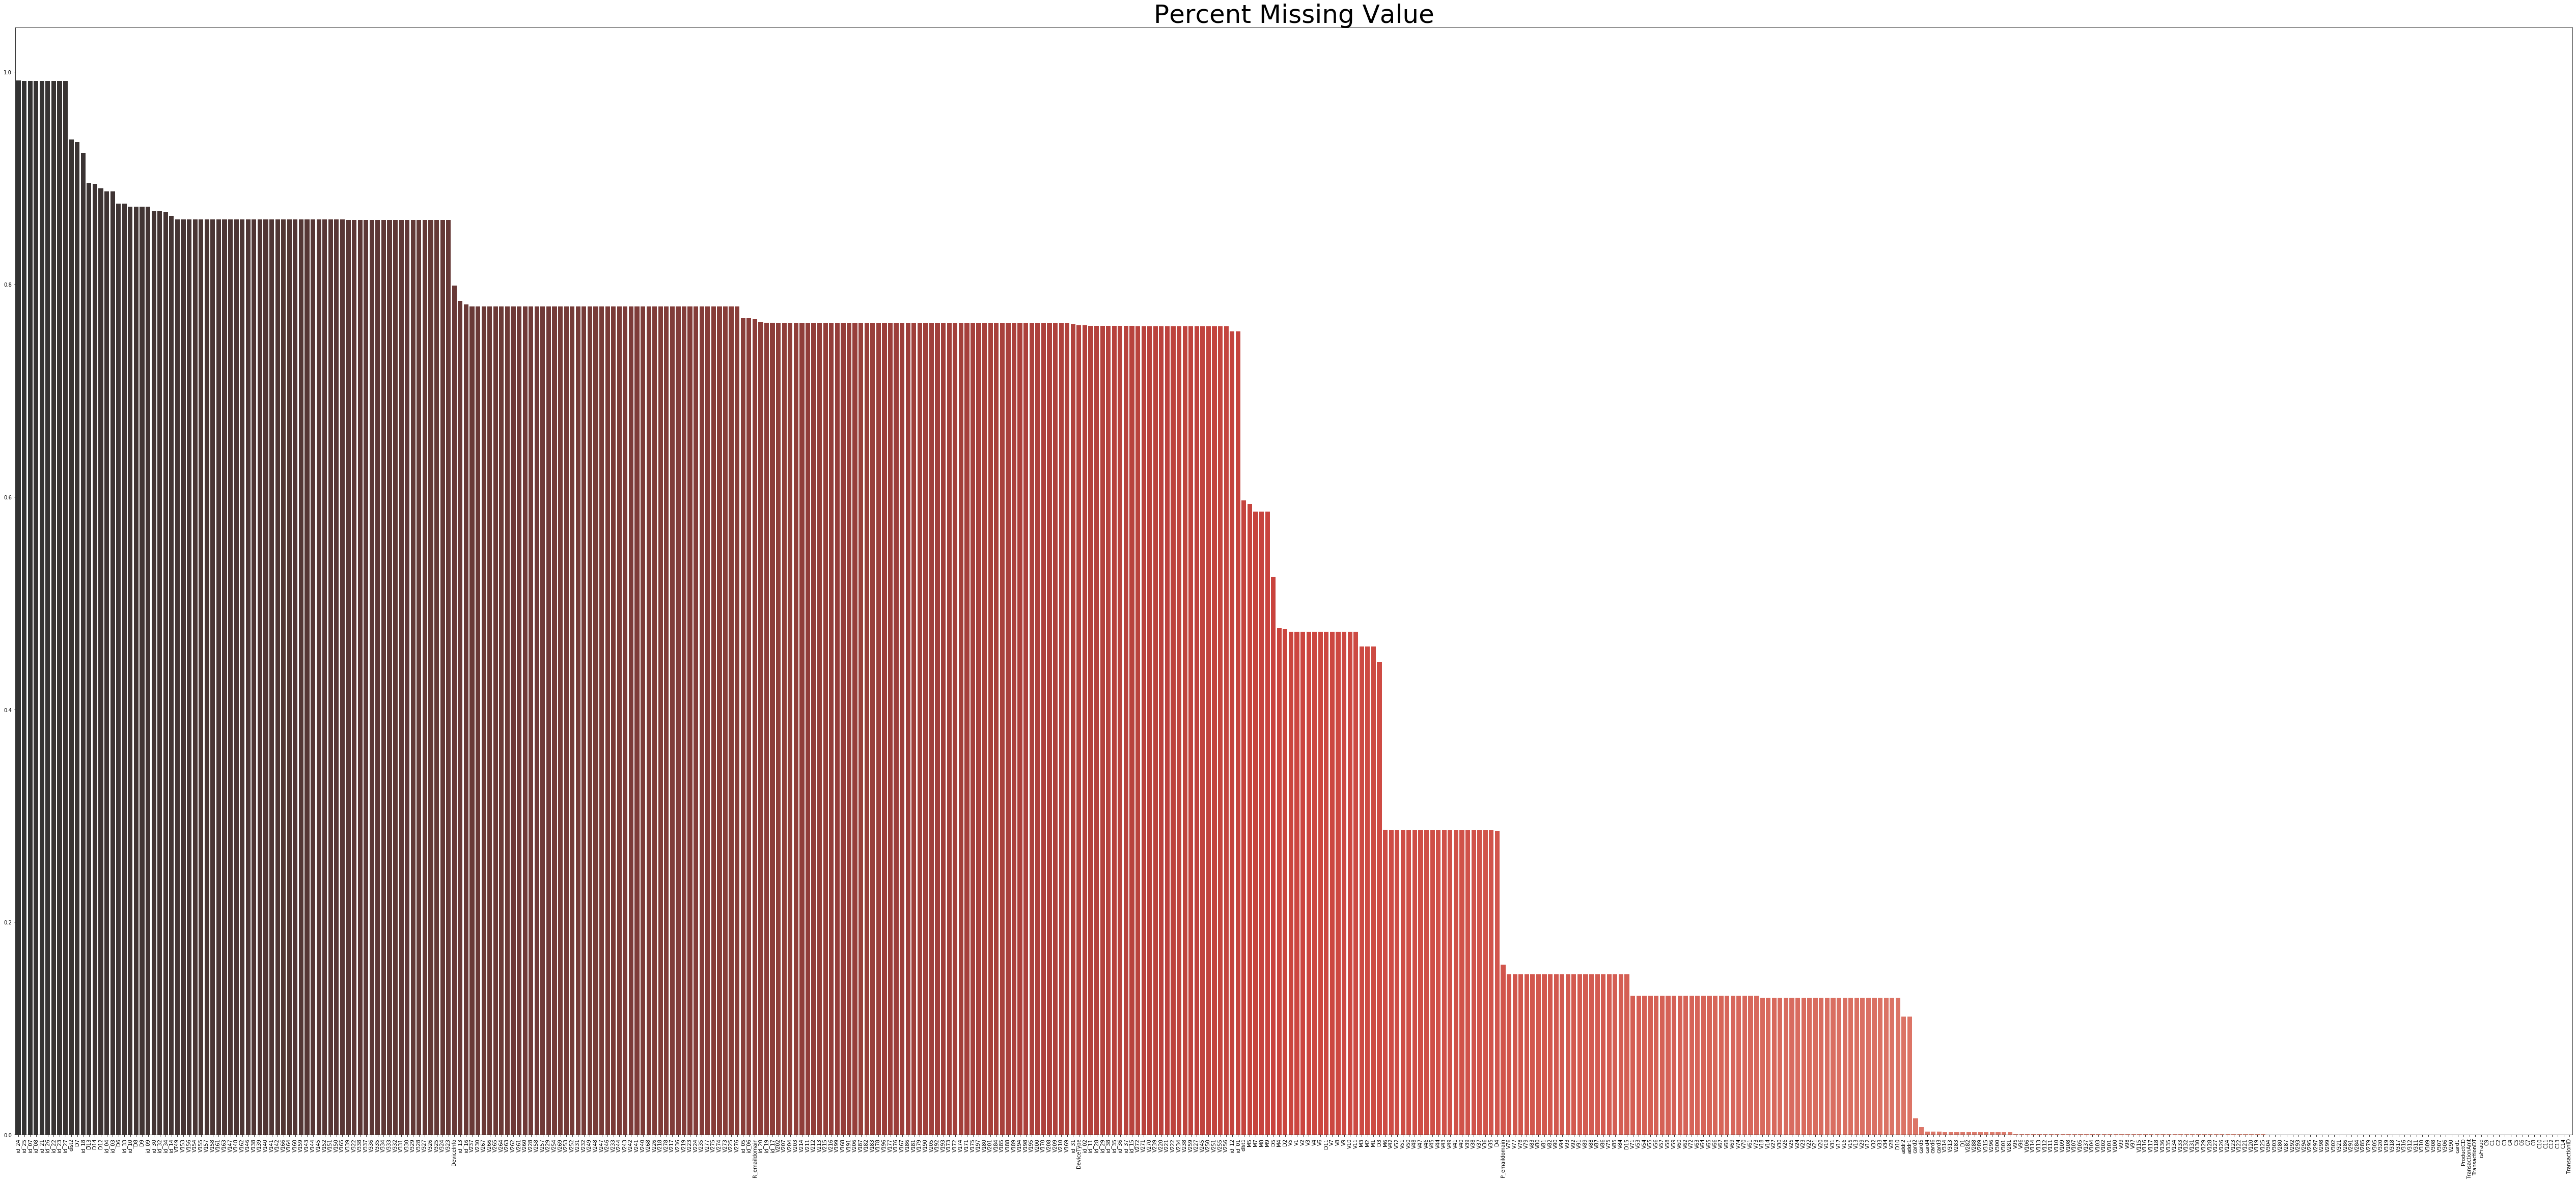

In [45]:
# a visualization to look at NA values
plt.figure(figsize=(90,40))
sns.barplot(y=train_full_df.isnull().sum().sort_values(ascending=False)/len(train_full_df),
            x=train_full_df.isnull().sum().sort_values(ascending=False).index,
            palette="Reds_d")
plt.title("Percent Missing Value",size=50)
plt.xticks(rotation=90)

In [46]:
# data prep
from sklearn.model_selection import train_test_split

In [47]:
# how to deal with NA. going to drop cols with higher NAs and then pull out NAs out of the remaining data
columns_def=pd.DataFrame({"na_count":train_full_df.isnull().sum().sort_values(ascending=False)})

In [49]:
#Create column of percent columns, #higher is worst
columns_def["per"]=columns_def["na_count"]/len(train_full_df)
columns_def

,na_count,per
id_24,585793,0.991962
id_25,585408,0.991310
id_07,585385,0.991271
id_08,585385,0.991271
id_21,585381,0.991264
...,...,...
C11,0,0.000000
C12,0,0.000000
C13,0,0.000000
C14,0,0.000000


In [50]:
#cycle throungh various limit for percent Na per column
range=[0.05, 0.10 ,0.15, 0.25, 0.40, 0.60, 0.75]


In [51]:
for i in range: 
    print (columns_def[columns_def["per"]<i].shape[0]/train_full_df.shape[1])

0.25806451612903225
0.25806451612903225
0.3686635944700461
0.41935483870967744
0.46543778801843316
0.5207373271889401
0.5207373271889401


In [52]:
#only columns w/ less 105 will remain
limit=0.15 

In [53]:
#Select final columns
columns_final=columns_def[columns_def["per"]<limit].index 

train_full_df=train_full_df[train_full_df.columns.intersection(columns_final)]

In [54]:
train_full_df.shape

(590540, 160)

In [55]:
train_full_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# dealing with categorical variables
# show our categorical variables
train_full_df[train_full_df.select_dtypes(include=['object']).columns]

,ProductCD,card4,card6
0,W,discover,credit
1,W,mastercard,credit
2,W,visa,debit
3,W,mastercard,debit
4,H,mastercard,credit
...,...,...,...
590535,W,visa,debit
590536,W,mastercard,debit
590537,W,mastercard,debit
590538,W,mastercard,debit


In [57]:
# create a dummy variable for card6
card6_dummy_df=pd.get_dummies(train_full_df["card6"])

In [36]:
# so from that one card6 variable we created 4 variables.
card6_dummy_df

,charge card,credit,debit,debit or credit
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
590535,0,0,1,0
590536,0,0,1,0
590537,0,0,1,0
590538,0,0,1,0


In [58]:
train_full_df.shape

(590540, 160)

In [59]:
# adding in the new dummy variable
train_full_df=pd.concat([train_full_df,card6_dummy_df],axis=1)

In [60]:
train_full_df.shape

(590540, 164)

In [61]:
train_full_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V316,V317,V318,V319,V320,V321,charge card,credit,debit,debit or credit
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,117.0,0.0,0.0,0.0,0.0,0,1,0,0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,50.0,1404.0,790.0,0.0,0.0,0.0,0,0,1,0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0


In [62]:
# grab only the numeric data
train_full_df=train_full_df._get_numeric_data()

# drop nas
train_full_df=train_full_df.dropna()

len(train_full_df[train_full_df["isFraud"]==1])/len(train_full_df)*100

2.04579077462003

In [63]:
# create df for x and y
x_full_df=train_full_df.drop(["isFraud"],axis=1)
y_full_df=train_full_df["isFraud"]

In [64]:
# split the data
X_train,X_test,y_train,y_test=train_test_split(x_full_df,y_full_df,test_size=0.50)

In [65]:
# modeling mods for scikit
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [66]:
# here's the logistic regression model
lr = LogisticRegression(solver='lbfgs')  
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
# check the score
lr.score(X_test, y_test)

0.9794758287640223

In [68]:
# while the above score looks good, we have to remember that, since there are so few things labeled as fraud in the data set, even if we labeled everything non fraud, we'd still get pretty close to this accuracy rate
y_pred=lr.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,214160,87,214247
1,4401,21,4422
All,218561,108,218669


In [69]:
recall_score(y_test, y_pred)

0.0047489823609226595